# Histograma

## Teoría:

<div style="text-align: justify">
¿Qué es un histograma? Se puede considerar el histograma como un gráfico o diagrama, que da una idea general sobre la distribución de intencidad de una imagen. Es una imagen con valores de píxeles (que van de 0 a 255, no siempre) en el eje X y el número correspondiente de píxeles en la imagen en el eje Y.

Esta es solo otra forma de entender la imagen. Al mirar el histograma de una image, se puede intuir el contraste, el brillo, la distribución de la intensidad, etc. de esa imagen.
</div>

## Encontrar un histograma

<div style="text-align: justify">
Primero aclaremos algunos conceptos:

BINS: El histograma anterior muestra el número de píxeles para cada valor de píxel, es decir, de 0 a 255. Es decir, necesita 256 valores para mostrar el histograma anterior. Pero considere, ¿qué sucede si no necesita encontrar el número de píxeles para todos los valores de píxeles por separado, sino el número de píxeles en un intervalo de valores de píxeles? Digamos, por ejemplo, que necesita encontrar el número de píxeles que se encuentran entre 0 y 15, luego 16 a 31, ..., 240 a 255. Solo necesitará 16 valores para representar el histograma. 

Entonces, lo que debe hacer es simplemente dividir todo el histograma en 16 subpartes y el valor de cada subparte es la suma de todos los píxeles que contiene. Esta cada subparte se llama 'BIN'. En el primer caso, el número de bins fue 256 (uno por cada píxel) mientras que en el segundo caso, es solo 16. BINS está representado por el término histSize en los documentos de OpenCV.

DIMS: 
Es la cantidad de parámetros para los que recopilamos los datos. En este caso, recopilamos datos sobre una sola cosa, el valor de intensidad. Así que aquí está 1.

RANGE: Es el rango de valores de intensidad que desea medir. Normalmente, es \[0, 256\], es decir, todos los valores de intensidad.
</div>

### Calcular histograma en OpenCV
La función ```cv.calcHist(images, channles, mask, histSize, ranges[,hist[,accumulate]])``` recibe los siguientes valores:

- Images: es la imagen de origen de tipo uint8 o float32. Se debe dar entre corchetes, es decir, '\[img\]'.

- Canales: también se da entre corchetes. Es el índice de canal para el que calculamos el histograma. Por ejemplo, si la entrada es una imagen en escala de grises, su valor es \[0\]. Para la imagen en color, puede pasar \[0\], \[1\] o \[2\] para calcular el histograma del canal azul, verde o rojo, respectivamente.

- Máscara: imagen de máscara. Para encontrar el histograma de imagen completa, se indica como - Ninguno'. Pero si desea encontrar el histograma de una región particular de la imagen, debe crear una imagen de máscara para eso y asignarla como máscara.

- HistSize: esto representa nuestro recuento de BIN. Debe indicarse entre corchetes. Para la escala completa, pasamos \[256\].

- Gamas: esta es nuestra GAMA. Normalmente es \[0,256\].

### Código para calcular los histogramas

Primero, importamos las libbrerías que vamos a utilizar.

In [18]:
import cv2 as cv 
from matplotlib import pyplot as plt
import numpy as np

Para el primer histograma necesitamos cargar la imagen en RGB.

In [53]:
img = cv.imread('../Resources/street.jpg')



Ahora definimos los colores a usar y calcularmos el histograma.

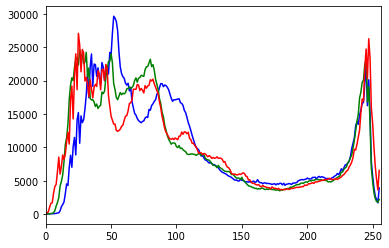

In [48]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Para calcular el histogram solo de intensidad podemos cargar la imagen en escala de grises. Utilizamos el "0" en el "imread" para lograr esto.

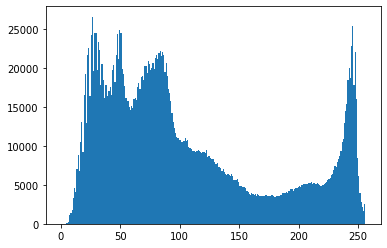

In [49]:
img = cv.imread('../Resources/street.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()


Ahora si quisieramos aplicar una máscara para crear el histrograma tomando solo como referencia una pequeña parte de la imagen se puede hacer de la siguiente manera.

1. Se crea la máscara:


In [57]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)


2. Se calcula el histograma con la máscara y sin la máscara.

In [ ]:
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])


Se ordenan los datos para la visualización.

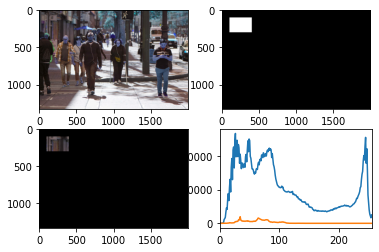

In [60]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()